# Create scenarios

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path

import aneris.convenience
import dotenv
import matplotlib.pyplot as plt
import pandas as pd
import scmdata
import tqdm.autonotebook as tqdman

import utils

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


<IPython.core.display.Javascript object>

In [3]:
dotenv.load_dotenv()

True

<IPython.core.display.Javascript object>

In [4]:
LANDUSE_PATHWAYS_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "pathways",
    "co2-uptake-pathways_{}.nc".format(utils.UPTAKE_PATHWAYS_ID),
)
LANDUSE_PATHWAYS_FILE

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/pathways/co2-uptake-pathways_7d7c42.nc'

<IPython.core.display.Javascript object>

In [5]:
SR15_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "harmonised-sr15-scenarios",
    "harmonised-sr15-emissions.nc",
)
SR15_FILE

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/harmonised-sr15-scenarios/harmonised-sr15-emissions.nc'

<IPython.core.display.Javascript object>

In [6]:
SVEN_TESKE_FILE = os.path.join(
    utils.DATA_DIR,
    "raw",
    "sven-teske-scenarios",
    "20210915-115846-UTS-output-076bd9-076bd9-076bd9-076bd9.csv",
)
SVEN_TESKE_FILE

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/raw/sven-teske-scenarios/20210915-115846-UTS-output-076bd9-076bd9-076bd9-076bd9.csv'

<IPython.core.display.Javascript object>

In [7]:
AFOLU_NO_MODEL_REPORTED_SINKS_FILE = os.path.join(
    utils.DATA_DIR,
    "interim",
    "afolu-no-model-reported-sinks",
    "co2-afolu-no-model-reported-sinks-emissions-from-sr15_{}.nc".format(
        utils.SCENARIO_CREATION_ID
    ),
)
AFOLU_NO_MODEL_REPORTED_SINKS_FILE

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/interim/afolu-no-model-reported-sinks/co2-afolu-no-model-reported-sinks-emissions-from-sr15_7d7c42.nc'

<IPython.core.display.Javascript object>

In [8]:
OUT_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "crunched-scenarios",
    "crunched-emissions-{}.nc".format(utils.SCENARIO_CREATION_ID),
)
os.makedirs(os.path.dirname(OUT_FILE), exist_ok=True)
OUT_FILE

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/crunched-scenarios/crunched-emissions-7d7c42.nc'

<IPython.core.display.Javascript object>

In [9]:
OUT_FILE_CO2_BREAKDOWN = os.path.join(
    utils.DATA_DIR,
    "processed",
    "crunched-scenarios",
    "co2-emissions-breakdown-{}.csv".format(utils.SCENARIO_CREATION_ID),
)
os.makedirs(os.path.dirname(OUT_FILE_CO2_BREAKDOWN), exist_ok=True)
OUT_FILE_CO2_BREAKDOWN

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/crunched-scenarios/co2-emissions-breakdown-7d7c42.csv'

<IPython.core.display.Javascript object>

## Landuse pathways

In [10]:
landuse_pathways = scmdata.ScmRun.from_nc(LANDUSE_PATHWAYS_FILE)
landuse_pathways

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<ScmRun (timeseries: 63000, timepoints: 281)>
Time:
	Start: 2020-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	       ensemble_member      model     region             scenario      unit  \
	0                    0  One Earth     Boreal  Climate restoration  GtC / yr   
	1                    0  One Earth     Boreal  Climate restoration  GtC / yr   
	2                    0  One Earth     Boreal  Climate restoration  GtC / yr   
	3                    0  One Earth  Temperate  Climate restoration  GtC / yr   
	4                    0  One Earth  Temperate  Climate restoration  GtC / yr   
	...                ...        ...        ...                  ...       ...   
	62995             2999  One Earth      World  Climate restoration  GtC / yr   
	62996             2999  One Earth      World  Climate restoration  GtC / yr   
	62997             2999  One Earth      World  Climate restoration  GtC / yr   
	62998             2999  One Earth      World  Climate restoration  GtC / yr   
	62999  

<IPython.core.display.Javascript object>

In [11]:
landuse_pathways.filter(region="World")

<ScmRun (timeseries: 18000, timepoints: 281)>
Time:
	Start: 2020-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	       ensemble_member      model region             scenario      unit  \
	15                   0  One Earth  World  Climate restoration  GtC / yr   
	16                   0  One Earth  World  Climate restoration  GtC / yr   
	17                   0  One Earth  World  Climate restoration  GtC / yr   
	18                   0  One Earth  World  Climate restoration  GtC / yr   
	19                   0  One Earth  World  Climate restoration  GtC / yr   
	...                ...        ...    ...                  ...       ...   
	62995             2999  One Earth  World  Climate restoration  GtC / yr   
	62996             2999  One Earth  World  Climate restoration  GtC / yr   
	62997             2999  One Earth  World  Climate restoration  GtC / yr   
	62998             2999  One Earth  World  Climate restoration  GtC / yr   
	62999             2999  One Earth  World  Climate r

<IPython.core.display.Javascript object>

In [12]:
# for v in landuse_pathways.filter(region="World").groupby("variable"):
#     ax = plt.figure(figsize=(12, 8)).add_subplot(111)
#     ax = v.lineplot(
#         hue="variable",
#         style="region",
#         units="ensemble_member",
#         estimator=None,
#         linewidth=0.25,
#         alpha=0.1,
#         time_axis="year",
#         ax=ax,
#     )
#     ax, lh = (
#         v.filter(region="World")
#         #     .integrate()
#         .plumeplot(
#             hue_var="variable",
#             hue_label="Variable",
#             quantile_over="ensemble_member",
#             style_var="region",
#             style_label="Region",
#             time_axis="year",
#             quantiles_plumes=[((0.05, 0.95), 0.6), ((0.5,), 1.0)],
#             linewidth=5,
#             ax=ax,
#         )
#     )
#     ax.set_xlim([2000, 2350])
#     # ax.legend(handles=lh, loc="best", handlelength=5)
#     plt.show()

<IPython.core.display.Javascript object>

In [13]:
quantiles_to_run = [0.05, 0.5, 0.95]

landuse_pathways_quantiles = scmdata.ScmRun(
    landuse_pathways.filter(variable="Uptake|CO2", region="World").quantiles_over(
        "ensemble_member", quantiles=quantiles_to_run
    )
)
landuse_pathways_quantiles

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


<ScmRun (timeseries: 3, timepoints: 281)>
Time:
	Start: 2020-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	       model  quantile region             scenario      unit    variable
	0  One Earth      0.05  World  Climate restoration  GtC / yr  Uptake|CO2
	1  One Earth      0.50  World  Climate restoration  GtC / yr  Uptake|CO2
	2  One Earth      0.95  World  Climate restoration  GtC / yr  Uptake|CO2

<IPython.core.display.Javascript object>

time                                                               2020-01-01 00:00:00  \
model     quantile region scenario            unit     variable                          
One Earth 0.05     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   
          0.50     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   
          0.95     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   

time                                                               2021-01-01 00:00:00  \
model     quantile region scenario            unit     variable                          
One Earth 0.05     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   
          0.50     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   
          0.95     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   

time                                                               2022-01-01 00:00:00  \
model     quantile region scenario            unit     variable                          
One Earth 0.05     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   
          0.50     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   
          0.95     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   

time                                                               2023-01-01 00:00:00  \
model     quantile region scenario            unit     variable                          
One Earth 0.05     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   
          0.50     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   
          0.95     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   

time                                                               2024-01-01 00:00:00  \
model     quantile region scenario            unit     variable                          
One Earth 0.05     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   
          0.50     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   
          0.95     World  Climate restoration GtC / yr Uptake|CO2                 -0.0   

time                                                               2025-01-01 00:00:00  \
model     quantile region scenario            unit     variable                          
One Earth 0.05     World  Climate restoration GtC / yr Uptake|CO2            -0.000000   
          0.50     World  Climate restoration GtC / yr Uptake|CO2            -0.000000   
          0.95     World  Climate restoration GtC / yr Uptake|CO2            -0.524404   

time                                                               2026-01-01 00:00:00  \
model     quantile region scenario            unit     variable                          
One Earth 0.05     World  Climate restoration GtC / yr Uptake|CO2            -0.013258   
          0.50     World  Climate restoration GtC / yr Uptake|CO2            -0.020649   
          0.95     World  Climate restoration GtC / yr Uptake|CO2            -0.531270   

time                                                               2027-01-01 00:00:00  \
model     quantile region scenario            unit     variable                          
One Earth 0.05     World  Climate restoration GtC / yr Uptake|CO2            -0.050461   
          0.50     World  Climate restoration GtC / yr Uptake|CO2            -0.077882   
          0.95     World  Climate restoration GtC / yr Uptake|CO2            -0.587602   

time                                                               2028-01-01 00:00:00  \
model     quantile region scenario            unit     variable                          
One Earth 0.05     World  Climate restoration GtC / yr Uptake|CO2            -0.105650   
          0.50     World  Climate restoration GtC / yr Uptake|CO2            -0.164303   
          0.95     World  Climat

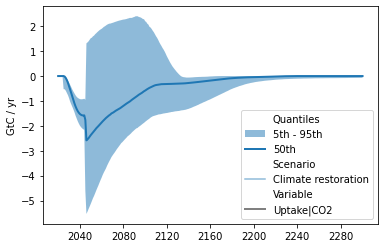

<IPython.core.display.Javascript object>

In [14]:
global_co2_emissions_from_landuse_pathways_quantiles = landuse_pathways_quantiles * -1
global_co2_emissions_from_landuse_pathways_quantiles.plumeplot(pre_calculated=True)
global_co2_emissions_from_landuse_pathways_quantiles.timeseries()

## Harmonise CO$_2$ emissions without model reported sinks

<ScmRun (timeseries: 42, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	                         model region                scenario  \
	0   Idealised from IMAGE 3.0.1  World  End deforestation 2030   
	1   Idealised from IMAGE 3.0.1  World  End deforestation 2035   
	2   Idealised from IMAGE 3.0.1  World  End deforestation 2040   
	3   Idealised from IMAGE 3.0.1  World  End deforestation 2050   
	4                  IMAGE 3.0.1  World                 SSP1-19   
	5          MESSAGE-GLOBIOM 1.0  World                 SSP1-19   
	6                  IMAGE 3.0.1  World                 SSP1-26   
	7          MESSAGE-GLOBIOM 1.0  World                 SSP1-26   
	8                  IMAGE 3.0.1  World                 SSP1-34   
	9          MESSAGE-GLOBIOM 1.0  World                 SSP1-34   
	10                 IMAGE 3.0.1  World                 SSP1-45   
	11         MESSAGE-GLOBIOM 1.0  World                 SSP1-45   
	12                 IMAGE 3.0.1  

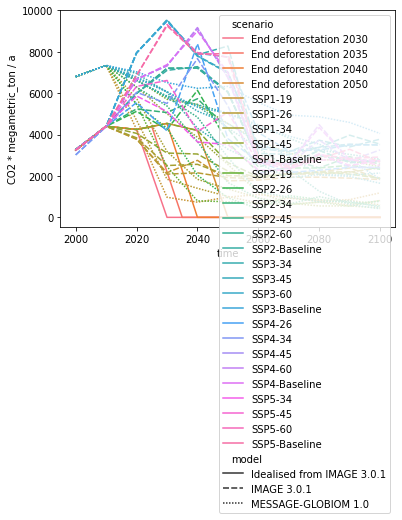

<IPython.core.display.Javascript object>

In [15]:
afolu_emissions_no_model_reported_sinks = scmdata.ScmRun.from_nc(
    AFOLU_NO_MODEL_REPORTED_SINKS_FILE
)
afolu_emissions_no_model_reported_sinks.lineplot(style="model")
afolu_emissions_no_model_reported_sinks

In [16]:
rcmip_emms = scmdata.ScmRun(
    os.path.join(
        utils.DATA_DIR,
        "raw",
        "rcmip",
        "rcmip-emissions-annual-means-v5-1-0.csv",
    ),
    lowercase_cols=True,
).filter(scenario="ssp245", region="World", variable="Emissions|CO2|MAGICC AFOLU")
# assume that in 2015 net emissions can be used to harmonise
# emissions without model reported sinks
rcmip_emms["variable"] = afolu_emissions_no_model_reported_sinks.get_unique_meta(
    "variable", True
)
rcmip_emms

<ScmRun (timeseries: 1, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	         activity_id mip_era            model region scenario       unit  \
	6569  not_applicable   CMIP6  MESSAGE-GLOBIOM  World   ssp245  Mt CO2/yr   
	
	                                         variable  
	6569  Emissions|CO2|AFOLU|No model reported sinks  

<IPython.core.display.Javascript object>

In [17]:
afolu_emissions_no_model_reported_sinks.head()

time                                                                                                                            2000-01-01  \
model                      region scenario               unit                     variable                                                   
Idealised from IMAGE 3.0.1 World  End deforestation 2030 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3250.218398   
                                  End deforestation 2035 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3250.218398   
                                  End deforestation 2040 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3250.218398   
                                  End deforestation 2050 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3250.218398   
IMAGE 3.0.1                World  SSP1-19                CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3250.218398   

time                                                                                                                            2001-01-01  \
model                      region scenario               unit                     variable                                                   
Idealised from IMAGE 3.0.1 World  End deforestation 2030 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3365.814256   
                                  End deforestation 2035 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3365.814256   
                                  End deforestation 2040 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3365.814256   
                                  End deforestation 2050 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3365.814256   
IMAGE 3.0.1                World  SSP1-19                CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3365.814256   

time                                                                                                                            2002-01-01  \
model                      region scenario               unit                     variable                                                   
Idealised from IMAGE 3.0.1 World  End deforestation 2030 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3481.094278   
                                  End deforestation 2035 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3481.094278   
                                  End deforestation 2040 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3481.094278   
                                  End deforestation 2050 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3481.094278   
IMAGE 3.0.1                World  SSP1-19                CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks  3481.094278   

time                                                                                                                           2003-01-01  \
model                      region scenario               unit                     variable                                                  
Idealised from IMAGE 3.0.1 World  End deforestation 2030 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks   3596.3743   
                                  End deforestation 2035 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks   3596.3743   
                                  End deforestation 2040 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks   3596.3743   
                                  End deforestation 2050 CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks   3596.3743   
IMAGE 3.0.1                World  SSP1-19                CO2 * megametric_ton / a Emissions|CO2|AFOLU|No model reported sinks   3596.3743   

time                       

<IPython.core.display.Javascript object>

In [18]:
afolu_emissions_no_model_reported_sinks_harmonised = scmdata.ScmRun(
    aneris.convenience.harmonise_all(
        afolu_emissions_no_model_reported_sinks.timeseries(time_axis="year"),
        rcmip_emms.drop_meta(["activity_id", "mip_era"]).timeseries(time_axis="year"),
        harmonisation_year=2015,
        overrides=pd.DataFrame([{"method": "reduce_ratio_2050"}]),
    )
).resample("AS")
afolu_emissions_no_model_reported_sinks_harmonised

<ScmRun (timeseries: 42, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	                         model region                scenario  \
	0   Idealised from IMAGE 3.0.1  World  End deforestation 2030   
	1   Idealised from IMAGE 3.0.1  World  End deforestation 2035   
	2   Idealised from IMAGE 3.0.1  World  End deforestation 2040   
	3   Idealised from IMAGE 3.0.1  World  End deforestation 2050   
	4                  IMAGE 3.0.1  World                 SSP1-19   
	5          MESSAGE-GLOBIOM 1.0  World                 SSP1-19   
	6                  IMAGE 3.0.1  World                 SSP1-26   
	7          MESSAGE-GLOBIOM 1.0  World                 SSP1-26   
	8                  IMAGE 3.0.1  World                 SSP1-34   
	9          MESSAGE-GLOBIOM 1.0  World                 SSP1-34   
	10                 IMAGE 3.0.1  World                 SSP1-45   
	11         MESSAGE-GLOBIOM 1.0  World                 SSP1-45   
	12                 IMAGE 3.0.1  

<IPython.core.display.Javascript object>

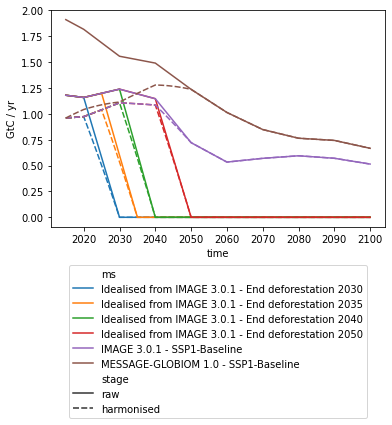

<IPython.core.display.Javascript object>

In [19]:
tmp = afolu_emissions_no_model_reported_sinks.copy()
tmp["stage"] = "raw"

tmpa = afolu_emissions_no_model_reported_sinks_harmonised.copy()
tmpa["stage"] = "harmonised"

pdf = scmdata.run_append([tmp, tmpa])
pdf["ms"] = pdf["model"] + " - " + pdf["scenario"]
ax = (
    pdf.filter(year=range(2015, 3000), scenario=["SSP1-Baseline", "End*"])
    .convert_unit("GtC / yr")
    .lineplot(hue="ms", style="stage")
)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc="upper center")

## Combine with CO$_2$ AFOLU emissions excluding model reported sinks

In [20]:
global_co2_emissions_from_landuse_pathways_quantiles_cut = (
    global_co2_emissions_from_landuse_pathways_quantiles.filter(
        year=range(
            afolu_emissions_no_model_reported_sinks["year"].min(),
            afolu_emissions_no_model_reported_sinks["year"].max() + 1,
        )
    )
)
if (
    2015
    not in global_co2_emissions_from_landuse_pathways_quantiles_cut["year"].tolist()
):
    global_co2_emissions_from_landuse_pathways_quantiles_cut = (
        global_co2_emissions_from_landuse_pathways_quantiles_cut.timeseries(
            time_axis="year"
        )
    )
    global_co2_emissions_from_landuse_pathways_quantiles_cut[2015] = 0
    global_co2_emissions_from_landuse_pathways_quantiles_cut = (
        global_co2_emissions_from_landuse_pathways_quantiles_cut[
            sorted(global_co2_emissions_from_landuse_pathways_quantiles_cut.columns)
        ]
    )
    global_co2_emissions_from_landuse_pathways_quantiles_cut = scmdata.ScmRun(
        global_co2_emissions_from_landuse_pathways_quantiles_cut
    ).resample("AS")

global_co2_emissions_from_landuse_pathways_quantiles_cut

<ScmRun (timeseries: 3, timepoints: 86)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	       model  quantile region             scenario      unit    variable
	0  One Earth      0.05  World  Climate restoration  GtC / yr  Uptake|CO2
	1  One Earth      0.50  World  Climate restoration  GtC / yr  Uptake|CO2
	2  One Earth      0.95  World  Climate restoration  GtC / yr  Uptake|CO2

<IPython.core.display.Javascript object>

Add a zero land-use pathways option too.

In [21]:
zero_ecores = (
    global_co2_emissions_from_landuse_pathways_quantiles_cut.filter(quantile=0.5) * 0
)
zero_ecores["quantile"] = "not_applied"
zero_ecores.timeseries()

time                                                                  2015-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2         0.0   

time                                                                  2016-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2         0.0   

time                                                                  2017-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2         0.0   

time                                                                  2018-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2         0.0   

time                                                                  2019-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2         0.0   

time                                                                  2020-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2         0.0   

time                                                                  2021-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2         0.0   

time                                                                  2022-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2         0.0   

time                                                                  2023-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2         0.0   

time                                                                  2024-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2         0.0   

time                                                                  ...  \
model     quantile    region scenario            unit     variable    ...   
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2  ...   

time                                                                  2091-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2        -0.0   

time                                                                  2092-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2        -0.0   

time                                                                  2093-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2        -0.0   

time                                                                  2094-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr Uptake|CO2        -0.0   

time                                                                  2095-01-01  \
model     quantile    region scenario            unit     variable                 
One Earth not_applied World  Climate restoration GtC / yr 

<IPython.core.display.Javascript object>

In [22]:
global_co2_emissions_from_landuse_pathways_quantiles_cut_plus = (
    global_co2_emissions_from_landuse_pathways_quantiles_cut.append(zero_ecores)
)
global_co2_emissions_from_landuse_pathways_quantiles_cut_plus

<ScmRun (timeseries: 4, timepoints: 86)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	       model     quantile region             scenario      unit    variable
	0  One Earth         0.05  World  Climate restoration  GtC / yr  Uptake|CO2
	1  One Earth          0.5  World  Climate restoration  GtC / yr  Uptake|CO2
	2  One Earth         0.95  World  Climate restoration  GtC / yr  Uptake|CO2
	3  One Earth  not_applied  World  Climate restoration  GtC / yr  Uptake|CO2

<IPython.core.display.Javascript object>

quantiles: 0it [00:00, ?it/s]

Landuse baselines:   0%|          | 0/5 [00:00<?, ?it/s]

Landuse baselines:   0%|          | 0/5 [00:00<?, ?it/s]

Landuse baselines:   0%|          | 0/5 [00:00<?, ?it/s]

Landuse baselines:   0%|          | 0/5 [00:00<?, ?it/s]

<ScmRun (timeseries: 20, timepoints: 86)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	    co2_landuse_baseline_model co2_landuse_baseline_scenario  \
	0                  IMAGE 3.0.1                 SSP1-Baseline   
	1   Idealised from IMAGE 3.0.1        End deforestation 2030   
	2   Idealised from IMAGE 3.0.1        End deforestation 2035   
	3   Idealised from IMAGE 3.0.1        End deforestation 2040   
	4   Idealised from IMAGE 3.0.1        End deforestation 2050   
	5                  IMAGE 3.0.1                 SSP1-Baseline   
	6   Idealised from IMAGE 3.0.1        End deforestation 2030   
	7   Idealised from IMAGE 3.0.1        End deforestation 2035   
	8   Idealised from IMAGE 3.0.1        End deforestation 2040   
	9   Idealised from IMAGE 3.0.1        End deforestation 2050   
	10                 IMAGE 3.0.1                 SSP1-Baseline   
	11  Idealised from IMAGE 3.0.1        End deforestation 2030   
	12  Idealised from IMAGE 3.0.1        End defo

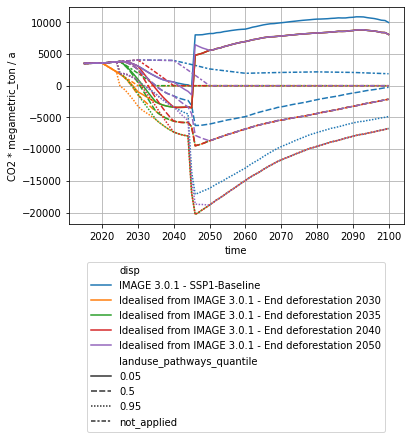

<IPython.core.display.Javascript object>

In [23]:
landuse_baseline_model_scenarios = (
    ("IMAGE 3.0.1", "SSP1-Baseline"),
    ("Idealised from IMAGE 3.0.1", "End deforestation 2030"),
    ("Idealised from IMAGE 3.0.1", "End deforestation 2035"),
    ("Idealised from IMAGE 3.0.1", "End deforestation 2040"),
    ("Idealised from IMAGE 3.0.1", "End deforestation 2050"),
    #     ("MESSAGE-GLOBIOM 1.0", "SSP1-Baseline"),
)

landuse_co2_variable = "Emissions|CO2|MAGICC AFOLU"
crunched_co2_afolu = []
co2_breakdown = []
for q_i, q in tqdman.tqdm(
    enumerate(
        global_co2_emissions_from_landuse_pathways_quantiles_cut_plus.groupby(
            "quantile"
        )
    ),
    desc="quantiles",
):
    quantile = q.get_unique_meta("quantile")

    for (landuse_baseline_model, landuse_baseline_scenario,) in tqdman.tqdm(
        landuse_baseline_model_scenarios, desc="Landuse baselines", leave=False
    ):
        co2_breakdown_h = [q.drop_meta("quantile")]
        baseline_landuse_co2 = (
            afolu_emissions_no_model_reported_sinks_harmonised.filter(
                scenario=landuse_baseline_scenario,
                model=landuse_baseline_model,
                variable="Emissions|CO2|AFOLU|No model reported sinks",
                year=q["year"].tolist(),
            )
        )
        co2_breakdown_h.append(baseline_landuse_co2)

        total_landuse_co2 = baseline_landuse_co2.add(
            q,
            op_cols={
                "model": utils.PREFIX,
                "scenario": "One Earth 2021",
                "variable": landuse_co2_variable,
            },
        )
        co2_breakdown_h.append(total_landuse_co2)

        co2_breakdown_h = scmdata.run_append(co2_breakdown_h).convert_unit("GtC / yr")
        for k, v in {
            "landuse_pathways_quantile": quantile,
            "co2_landuse_baseline_model": landuse_baseline_model,
            "co2_landuse_baseline_scenario": landuse_baseline_scenario,
        }.items():
            total_landuse_co2[k] = v
            co2_breakdown_h[k] = v

        for k in ("model", "scenario"):
            co2_breakdown_h[k] = total_landuse_co2.get_unique_meta(k, True)

        crunched_co2_afolu.append(total_landuse_co2)
        co2_breakdown.append(co2_breakdown_h)

crunched_co2_afolu = scmdata.run_append(crunched_co2_afolu)
pdf = crunched_co2_afolu.copy()
pdf["disp"] = (
    pdf["co2_landuse_baseline_model"] + " - " + pdf["co2_landuse_baseline_scenario"]
)
ax = pdf.lineplot(hue="disp", style="landuse_pathways_quantile")
ax.legend(bbox_to_anchor=(0.5, -0.15), loc="upper center")
ax.grid()
crunched_co2_afolu

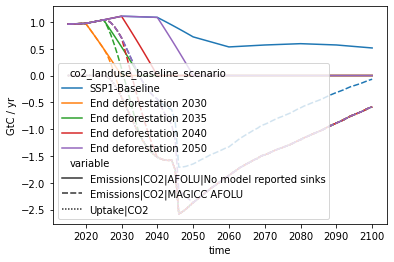

<IPython.core.display.Javascript object>

In [24]:
co2_breakdown = scmdata.run_append(co2_breakdown)
co2_breakdown.filter(landuse_pathways_quantile=0.5).lineplot(
    hue="co2_landuse_baseline_scenario", style="variable"
)

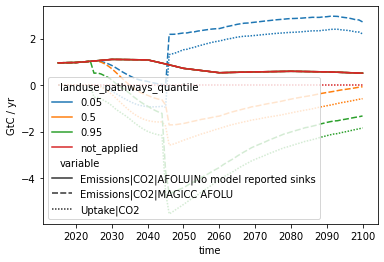

<IPython.core.display.Javascript object>

In [25]:
co2_breakdown.filter(co2_landuse_baseline_scenario="SSP1-Baseline").lineplot(
    hue="landuse_pathways_quantile", style="variable"
)

## Combine with SR1.5 and Sven Teske output

In [26]:
sr15_output = scmdata.ScmRun.from_nc(SR15_FILE)
sr15_output

<ScmRun (timeseries: 9453, timepoints: 18)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	        model region                                 scenario           unit  \
	0     AIM_2_0  World                   ADVANCE_2020_1.5C-2100     Mt BC / yr   
	1     AIM_2_0  World                   ADVANCE_2020_1.5C-2100   kt C2F6 / yr   
	2     AIM_2_0  World                   ADVANCE_2020_1.5C-2100  kt C6F14 / yr   
	3     AIM_2_0  World                   ADVANCE_2020_1.5C-2100    kt CF4 / yr   
	4     AIM_2_0  World                   ADVANCE_2020_1.5C-2100    Mt CH4 / yr   
	...       ...    ...                                      ...            ...   
	9448  AIM_2_1  World  TransportERL_Baseline_NoTransportPolicy    Mt NOx / yr   
	9449  AIM_2_1  World  TransportERL_Baseline_NoTransportPolicy     Mt OC / yr   
	9450  AIM_2_1  World  TransportERL_Baseline_NoTransportPolicy    kt SF6 / yr   
	9451  AIM_2_1  World  TransportERL_Baseline_NoTransportPolicy      Mt S / yr   

<IPython.core.display.Javascript object>

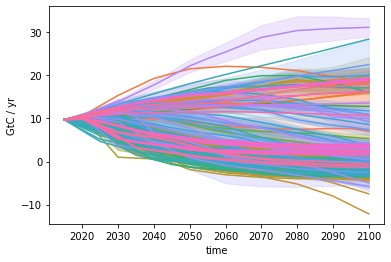

<IPython.core.display.Javascript object>

In [27]:
sr15_output.filter(variable="Emissions|CO2|*Fossil*").convert_unit("GtC / yr").lineplot(
    legend=False
)

In [28]:
sr15_output_interpolated = sr15_output.interpolate(crunched_co2_afolu["time"])
sr15_output_interpolated

<ScmRun (timeseries: 9453, timepoints: 86)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	        model region                                 scenario           unit  \
	0     AIM_2_0  World                   ADVANCE_2020_1.5C-2100     Mt BC / yr   
	1     AIM_2_0  World                   ADVANCE_2020_1.5C-2100   kt C2F6 / yr   
	2     AIM_2_0  World                   ADVANCE_2020_1.5C-2100  kt C6F14 / yr   
	3     AIM_2_0  World                   ADVANCE_2020_1.5C-2100    kt CF4 / yr   
	4     AIM_2_0  World                   ADVANCE_2020_1.5C-2100    Mt CH4 / yr   
	...       ...    ...                                      ...            ...   
	9448  AIM_2_1  World  TransportERL_Baseline_NoTransportPolicy    Mt NOx / yr   
	9449  AIM_2_1  World  TransportERL_Baseline_NoTransportPolicy     Mt OC / yr   
	9450  AIM_2_1  World  TransportERL_Baseline_NoTransportPolicy    kt SF6 / yr   
	9451  AIM_2_1  World  TransportERL_Baseline_NoTransportPolicy      Mt S / yr   

<IPython.core.display.Javascript object>

In [29]:
# sr15_output_interpolated.filter(scenario="LowEnergyDemand")

<IPython.core.display.Javascript object>

In [30]:
# sorted(sr15_output_interpolated.get_unique_meta("model"))

<IPython.core.display.Javascript object>

In [31]:
sven_teske_output = (
    scmdata.ScmRun(SVEN_TESKE_FILE)
    .filter(variable="Emissions*", stage="infilled")
    .drop_meta(
        [
            "climate_model",
            "percentile",
            "reference_period_start_year",
            "reference_period_end_year",
            "stage",
            "run_id",
        ]
    )
)
sven_teske_output["variable"] = (sven_teske_output["variable"]).apply(
    lambda x: x.replace("|CO2|", "|CO2|MAGICC ")
)
broken_name = [
    v
    for v in set(sven_teske_output.get_unique_meta("variable"))
    - set(sr15_output.get_unique_meta("variable"))
    if "CO2" in v
]
assert not any(broken_name), broken_name
sven_teske_output = scmdata.ScmRun(
    sven_teske_output.timeseries(drop_all_nan_times=True)
).interpolate(global_co2_emissions_from_landuse_pathways_quantiles_cut["time"])
sven_teske_output

<ScmRun (timeseries: 208, timepoints: 86)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	    model region             scenario         unit  \
	0     UTS  World     Reference_global    Mt CO2/yr   
	1     UTS  World  Reference_sectorial    Mt CO2/yr   
	2     UTS  World                   S1    Mt CO2/yr   
	3     UTS  World                   S2    Mt CO2/yr   
	4     UTS  World     Reference_global    Mt CO2/yr   
	..    ...    ...                  ...          ...   
	203   UTS  World                   S2    kt SF6/yr   
	204   UTS  World                   S2  kt SO2F2/yr   
	205   UTS  World                   S2      Mt S/yr   
	206   UTS  World                   S2  Mt NMVOC/yr   
	207   UTS  World                   S2  kt cC4F8/yr   
	
	                                       variable  
	0                    Emissions|CO2|MAGICC AFOLU  
	1                    Emissions|CO2|MAGICC AFOLU  
	2                    Emissions|CO2|MAGICC AFOLU  
	3                    Emi

<IPython.core.display.Javascript object>

Add in a delayed version of the S2 scenario.

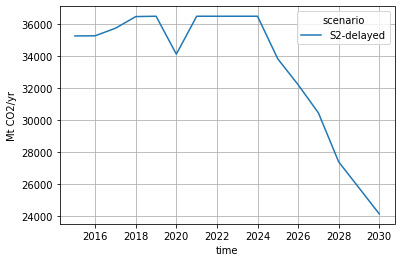

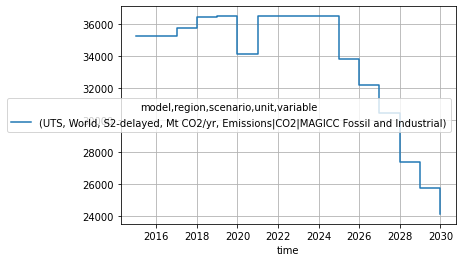

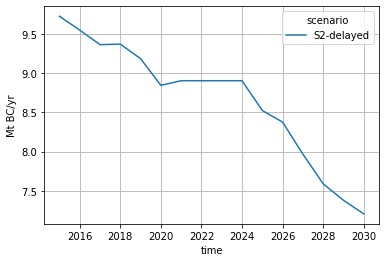

<ScmRun (timeseries: 52, timepoints: 89)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2103-01-01T00:00:00
Meta:
	   model region    scenario             unit  \
	0    UTS  World  S2-delayed        Mt CO2/yr   
	1    UTS  World  S2-delayed        Mt CO2/yr   
	2    UTS  World  S2-delayed         Mt BC/yr   
	3    UTS  World  S2-delayed       kt C2F6/yr   
	4    UTS  World  S2-delayed       kt C3F8/yr   
	5    UTS  World  S2-delayed      kt C4F10/yr   
	6    UTS  World  S2-delayed      kt C5F12/yr   
	7    UTS  World  S2-delayed      kt C6F14/yr   
	8    UTS  World  S2-delayed      kt C7F16/yr   
	9    UTS  World  S2-delayed      kt C8F18/yr   
	10   UTS  World  S2-delayed       kt CCl4/yr   
	11   UTS  World  S2-delayed        kt CF4/yr   
	12   UTS  World  S2-delayed     kt CFC113/yr   
	13   UTS  World  S2-delayed     kt CFC114/yr   
	14   UTS  World  S2-delayed     kt CFC115/yr   
	15   UTS  World  S2-delayed      kt CFC11/yr   
	16   UTS  World  S2-delayed      kt CFC12/yr   
	17   UTS 

<IPython.core.display.Javascript object>

In [32]:
delay_start = 2021
delay_until = 2025

s2_delayed = sven_teske_output.filter(scenario="S2").timeseries(time_axis="year")


def delay_drop(y):
    if y > delay_start:
        return y + delay_until - delay_start - 1

    return y


s2_delayed.columns = s2_delayed.columns.map(delay_drop)

for y in range(delay_start + 1, delay_until):
    s2_delayed[y] = s2_delayed[delay_start]

s2_delayed = scmdata.ScmRun(s2_delayed)
s2_delayed["scenario"] = "S2-delayed"
ax = s2_delayed.filter(variable="*CO2*Fossil*", year=range(2015, 2030 + 1)).lineplot()
ax.grid()
plt.show()
ax = (
    s2_delayed.filter(variable="*CO2*Fossil*", year=range(2015, 2030 + 1))
    .timeseries(time_axis="year")
    .T.plot(drawstyle="steps-post")
)
ax.grid()
plt.show()
ax = s2_delayed.filter(variable="*BC", year=range(2015, 2030 + 1)).lineplot()
ax.grid()
plt.show()

s2_delayed

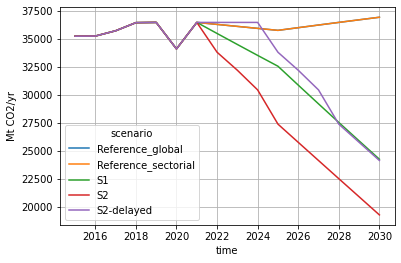

<IPython.core.display.Javascript object>

In [33]:
sven_teske_output = sven_teske_output.append(s2_delayed)
ax = sven_teske_output.filter(
    variable="*Emissions|CO2|MAGICC Fossil*", year=range(2015, 2030 + 1)
).lineplot()
ax.grid()

In [34]:
# sorted(sr15_output_interpolated.filter(model="IMAGE*").get_unique_meta("scenario"))

<IPython.core.display.Javascript object>

In [35]:
sr15_output_interpolated_plus = sr15_output_interpolated.append(sven_teske_output)

<IPython.core.display.Javascript object>

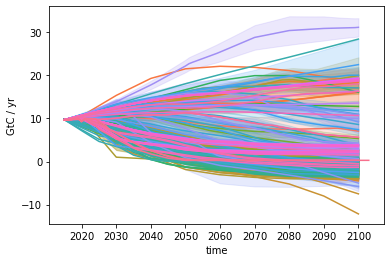

<IPython.core.display.Javascript object>

In [36]:
sr15_output_interpolated_plus.filter(variable="Emissions|CO2|*Fossil*").convert_unit(
    "GtC / yr"
).lineplot(legend=False)

In [37]:
nonlanduse_model_scenarios = (
    #     ("AIM_2_0", "SSP2-Baseline"),
    #     ("IMAGE_3_0_1", "SSP1-19"),
    #         ("MESSAGE-GLOBIOM_1_0", "SSP1-19"),
    #     ("POLES_EMF33", "EMF33_1.5C_limbio"),
    ("UTS", "S2"),
    ("UTS", "S2-delayed"),
    ("MESSAGEix-GLOBIOM_1_0", "LowEnergyDemand"),
    ("IMAGE_3_0_1", "IMA15-TOT"),
)

co2_breakdown_save = co2_breakdown.copy()
co2_breakdown = []
crunched_scenarios = []
groups = [
    "co2_landuse_baseline_model",
    "co2_landuse_baseline_scenario",
    "landuse_pathways_quantile",
]
for total_landuse_co2 in tqdman.tqdm(
    crunched_co2_afolu.groupby(groups),
    desc="afolu pathways",
):
    for (nonlanduse_baseline_model, nonlanduse_baseline_scenario) in tqdman.tqdm(
        nonlanduse_model_scenarios, desc="Non-landuse emissions", leave=False
    ):
        co2_breakdown_h = co2_breakdown_save.copy()
        for k in groups:
            co2_breakdown_h = co2_breakdown_h.filter(
                **{k: total_landuse_co2.get_unique_meta(k, True)}
            )
        nonlanduse_co2 = sr15_output_interpolated_plus.filter(
            model=nonlanduse_baseline_model,
            scenario=nonlanduse_baseline_scenario,
        ).filter(variable=landuse_co2_variable, keep=False)

        output = total_landuse_co2.append(nonlanduse_co2)
        co2_breakdown_h = co2_breakdown_h.append(
            nonlanduse_co2.filter(variable="Emissions|CO2*Fossil*")
        ).convert_unit("GtC / yr")
        for k, v in {
            "nonco2_landuse_baseline_model": nonlanduse_baseline_model,
            "nonco2_landuse_baseline_scenario": nonlanduse_baseline_scenario,
            "model": utils.PREFIX,
            "scenario": "One Earth 2021",
        }.items():
            output[k] = v
            co2_breakdown_h[k] = v

        for k in groups:
            v = total_landuse_co2.get_unique_meta(k, True)
            output[k] = v
            co2_breakdown_h[k] = v

        crunched_scenarios.append(output)
        co2_breakdown.append(co2_breakdown_h.copy())

co2_breakdown = scmdata.run_append(co2_breakdown)
crunched_scenarios = scmdata.run_append(crunched_scenarios)
crunched_scenarios

afolu pathways: 0it [00:00, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

Non-landuse emissions:   0%|          | 0/4 [00:00<?, ?it/s]

<ScmRun (timeseries: 3000, timepoints: 89)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2103-01-01T00:00:00
Meta:
	      co2_landuse_baseline_model co2_landuse_baseline_scenario  \
	0                    IMAGE 3.0.1                 SSP1-Baseline   
	1                    IMAGE 3.0.1                 SSP1-Baseline   
	2                    IMAGE 3.0.1                 SSP1-Baseline   
	3                    IMAGE 3.0.1                 SSP1-Baseline   
	4                    IMAGE 3.0.1                 SSP1-Baseline   
	...                          ...                           ...   
	2995  Idealised from IMAGE 3.0.1        End deforestation 2050   
	2996  Idealised from IMAGE 3.0.1        End deforestation 2050   
	2997  Idealised from IMAGE 3.0.1        End deforestation 2050   
	2998  Idealised from IMAGE 3.0.1        End deforestation 2050   
	2999  Idealised from IMAGE 3.0.1        End deforestation 2050   
	
	     landuse_pathways_quantile           model nonco2_landuse_baseline_model  \
	0 

<IPython.core.display.Javascript object>

In [38]:
co2_breakdown_h

<ScmRun (timeseries: 4, timepoints: 89)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2103-01-01T00:00:00
Meta:
	   co2_landuse_baseline_model co2_landuse_baseline_scenario  \
	0  Idealised from IMAGE 3.0.1        End deforestation 2050   
	1  Idealised from IMAGE 3.0.1        End deforestation 2050   
	2  Idealised from IMAGE 3.0.1        End deforestation 2050   
	3  Idealised from IMAGE 3.0.1        End deforestation 2050   
	
	  landuse_pathways_quantile           model nonco2_landuse_baseline_model  \
	0               not_applied  One Earth 2021                   IMAGE_3_0_1   
	1               not_applied  One Earth 2021                   IMAGE_3_0_1   
	2               not_applied  One Earth 2021                   IMAGE_3_0_1   
	3               not_applied  One Earth 2021                   IMAGE_3_0_1   
	
	  nonco2_landuse_baseline_scenario region        scenario      unit  \
	0                        IMA15-TOT  World  One Earth 2021  GtC / yr   
	1                        IMA15-TOT

<IPython.core.display.Javascript object>

In [39]:
co2_breakdown

<ScmRun (timeseries: 320, timepoints: 89)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2103-01-01T00:00:00
Meta:
	     co2_landuse_baseline_model co2_landuse_baseline_scenario  \
	0                   IMAGE 3.0.1                 SSP1-Baseline   
	1                   IMAGE 3.0.1                 SSP1-Baseline   
	2                   IMAGE 3.0.1                 SSP1-Baseline   
	3                   IMAGE 3.0.1                 SSP1-Baseline   
	4                   IMAGE 3.0.1                 SSP1-Baseline   
	..                          ...                           ...   
	315  Idealised from IMAGE 3.0.1        End deforestation 2050   
	316  Idealised from IMAGE 3.0.1        End deforestation 2050   
	317  Idealised from IMAGE 3.0.1        End deforestation 2050   
	318  Idealised from IMAGE 3.0.1        End deforestation 2050   
	319  Idealised from IMAGE 3.0.1        End deforestation 2050   
	
	    landuse_pathways_quantile           model nonco2_landuse_baseline_model  \
	0               

<IPython.core.display.Javascript object>

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/crunched-scenarios/co2-emissions-breakdown-7d7c42.csv'

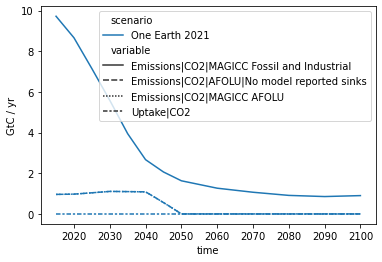

<IPython.core.display.Javascript object>

In [40]:
co2_breakdown_h.convert_unit("GtC / yr").lineplot(style="variable")
co2_breakdown.to_csv(OUT_FILE_CO2_BREAKDOWN)
OUT_FILE_CO2_BREAKDOWN

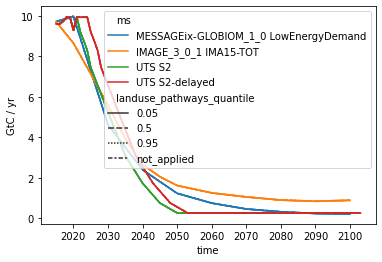

<IPython.core.display.Javascript object>

In [41]:
pdf = crunched_scenarios.filter(
    variable="Emissions|CO2|MAGICC Fossil and Industrial",  # year=range(2015, 2020 + 1)
)
pdf["ms"] = (
    pdf["nonco2_landuse_baseline_model"] + " " + pdf["nonco2_landuse_baseline_scenario"]
)
pdf.convert_unit("GtC / yr").lineplot(hue="ms", style="landuse_pathways_quantile")

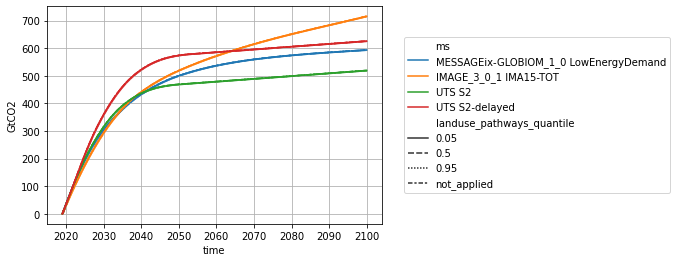

<IPython.core.display.Javascript object>

In [42]:
pdf = crunched_scenarios.filter(
    variable="Emissions|CO2|MAGICC Fossil and Industrial", year=range(2019, 2100 + 1)
).integrate()
pdf["ms"] = (
    pdf["nonco2_landuse_baseline_model"] + " " + pdf["nonco2_landuse_baseline_scenario"]
)
ax = pdf.convert_unit("GtCO2").lineplot(hue="ms", style="landuse_pathways_quantile")
ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
ax.grid()

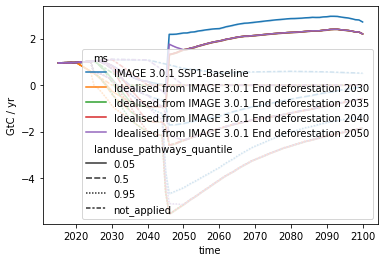

<IPython.core.display.Javascript object>

In [43]:
pdf = crunched_scenarios.filter(variable="Emissions|CO2|MAGICC AFOLU")
pdf["ms"] = (
    pdf["co2_landuse_baseline_model"] + " " + pdf["co2_landuse_baseline_scenario"]
)
pdf.convert_unit("GtC / yr").lineplot(hue="ms", style="landuse_pathways_quantile")

In [44]:
dimensions = (
    "scenario",
    "landuse_pathways_quantile",
    "co2_landuse_baseline_scenario",
    "nonco2_landuse_baseline_scenario",
)
extras = ("co2_landuse_baseline_model", "nonco2_landuse_baseline_model")

for c in dimensions + extras:
    #     if c == "landuse_pathways_quantile":
    #         continue

    crunched_scenarios[c] = crunched_scenarios[c].apply(str)


crunched_scenarios.convert_unit(
    "Mt NOx/yr", variable="Emissions|NOx", context="NOx_conversions"
).convert_unit(
    "kt HFC4310mee/yr", variable="Emissions|HFC4310*", context="NOx_conversions"
).drop_meta(
    "unit_context"
).to_nc(
    OUT_FILE, dimensions=dimensions, extras=extras
)

<IPython.core.display.Javascript object>

In [45]:
display(len(crunched_scenarios.get_unique_meta("variable")))
crunched_scenarios.get_unique_meta("variable")

52

['Emissions|CO2|MAGICC AFOLU',
 'Emissions|CO2|MAGICC Fossil and Industrial',
 'Emissions|BC',
 'Emissions|C2F6',
 'Emissions|C3F8',
 'Emissions|C4F10',
 'Emissions|C5F12',
 'Emissions|C6F14',
 'Emissions|C7F16',
 'Emissions|C8F18',
 'Emissions|CCl4',
 'Emissions|CF4',
 'Emissions|CFC113',
 'Emissions|CFC114',
 'Emissions|CFC115',
 'Emissions|CFC11',
 'Emissions|CFC12',
 'Emissions|CH2Cl2',
 'Emissions|CH3Br',
 'Emissions|CH3CCl3',
 'Emissions|CH3Cl',
 'Emissions|CH4',
 'Emissions|CHCl3',
 'Emissions|CO',
 'Emissions|HCFC141b',
 'Emissions|HCFC142b',
 'Emissions|HCFC22',
 'Emissions|HFC125',
 'Emissions|HFC134a',
 'Emissions|HFC143a',
 'Emissions|HFC152a',
 'Emissions|HFC227ea',
 'Emissions|HFC236fa',
 'Emissions|HFC23',
 'Emissions|HFC245fa',
 'Emissions|HFC32',
 'Emissions|HFC365mfc',
 'Emissions|HFC4310mee',
 'Emissions|Halon1202',
 'Emissions|Halon1211',
 'Emissions|Halon1301',
 'Emissions|Halon2402',
 'Emissions|N2O',
 'Emissions|NF3',
 'Emissions|NH3',
 'Emissions|NOx',
 'Emissio

<IPython.core.display.Javascript object>